# Stock Market Prediction using News headlines 

In [1]:
pip install cufflinks

  Using cached cufflinks-0.17.3.tar.gz (81 kB)

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=17386961e78a4907ecca4fa8df2508755856aea9f574d0aa7fc70be2827481f8
  Stored in directory: c:\users\rk\appdata\local\pip\cache\wheels\1c\db\ce\70cf35eb5a61b9ea3d34434072a8821dddc4f21eb5127e5415
Successfully built cufflinks


In [2]:
import pandas_profiling
import nltk
import string
import numpy as np
import pandas as pd
import re
import textblob
import matplotlib.pyplot as plt 
import plotly as py
import seaborn as sns
import cufflinks as cf
from plotly.offline import iplot
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import os
os.getcwd() 

'C:\\Users\\RK\\Desktop\\Tecnocolabs_Project'

In [4]:
os.chdir('C:/Users/RK\Desktop/Tecnocolabs_Project/Datasets of Stocks Market and Stock News Articles/Stocks News Articles Datasets')

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [6]:
News2015 = pd.read_csv('Headlines_2015.csv',index_col='Date',date_parser=dateparse)

In [7]:
News2016 = pd.read_csv('Headlines_2016.csv',index_col='Date',date_parser=dateparse)

In [8]:
News2016

,Headlines
Date,
2016-01-01,Investors Buy Apple Inc. (AAPL) on Weakness Be...
2016-01-02,AAPL Stock: Is This the Next Big Thing from Ap...
2016-01-03,Global Equities&quot; Trip Chowdhry Blasts App...
2016-01-04,Stifel Nicolaus Reiterates Buy Rating for Appl...
2016-01-05,Apple Sitting Out The Rally Apple&quot;s (AAPL...
...,...
2016-12-27,Why Apple Inc.&quot;s Next iPad Pro Won&quot;t...
2016-12-28,Better Buy: GoPro Inc vs. Garmin Ltd. What Tim...
2016-12-29,Family Sues Apple for not using a patented iOS...


In [9]:
News2016.dtypes

Headlines    object
dtype: object

In [10]:
News2017 = pd.read_csv('Headlines_2017.csv',index_col='Date',date_parser=dateparse)

In [11]:
News2018 = pd.read_csv('Headlines_2018.csv',index_col='Date',date_parser=dateparse)

In [12]:
News2019 = pd.read_csv('Headlines_2019.csv',index_col='Date',date_parser=dateparse)

In [13]:
News2020 = pd.read_csv('Headlines_2020.csv',index_col='Date',date_parser=dateparse)

In [14]:
News2021 = pd.read_csv('Headlines_2021.csv',index_col='Date',date_parser=dateparse)

In [15]:
News2016.tail(5)

,Headlines
Date,
2016-12-27,Why Apple Inc.&quot;s Next iPad Pro Won&quot;t...
2016-12-28,Better Buy: GoPro Inc vs. Garmin Ltd. What Tim...
2016-12-29,Family Sues Apple for not using a patented iOS...
2016-12-30,Apple: Nikkei Warns of Further Production Cuts...
2016-12-31,Stanphyl Ends 2016 Up Up 31% And Confident Of ...


In [16]:
News2017.tail(5)

,Headlines
Date,
2017-12-27,"Apple Boosts Pay of CEO Cook, Other Executives..."
2017-12-28,Wall Street little changed as tech treads wate...
2017-12-29,Australia is set to Launch the Largest-Ever Cl...
2017-12-30,Apple offers replacement iPhone batteries effe...
2017-12-31,Laggards Will Become Leaders For The DJIA In 2...


In [17]:
News2021.tail(5)

,Headlines
Date,
2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
2021-06-21,Apple is shortening new free TV Plus trials fr...
2021-06-22,Google likely to soon face antitrust claims ov...
2021-06-23,French court sets date in Apple case over App ...


In [18]:
Merged_Data=News2015.append([News2016,News2017, News2018,News2019,News2020,News2021])

In [19]:
Merged_Data

,Headlines
Date,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
2015-01-02,What to expect from Apple in 2015 beyond its s...
2015-01-03,Mountie: An inexpensive and innovative way to ...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...
2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
2021-06-21,Apple is shortening new free TV Plus trials fr...


In [20]:
Merged_Data.to_csv('Combined_Headlines_Data.csv')

In [21]:
Merged_Data.shape

(2365, 1)

In [22]:
Merged_Data.drop_duplicates(inplace = True)

In [23]:
Merged_Data.shape

(2332, 1)

In [24]:
Merged_Data.isnull().sum()

Headlines    0
dtype: int64

In [25]:
data=Merged_Data

In [26]:
#Removing all the greek characters using unidecode library
data['cleaned_Headlines'] = data['Headlines'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 

In [27]:
data

,Headlines,cleaned_Headlines
Date,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,What Can We Expect From Apple Inc. In 2015? 1 ...
2015-01-02,What to expect from Apple in 2015 beyond its s...,What to expect from Apple in 2015 beyond its s...
2015-01-03,Mountie: An inexpensive and innovative way to ...,Mountie: An inexpensive and innovative way to ...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...","Donald Yacktman on the Sources of Moats, His C..."
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...","SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...,Best pre-Prime Day smartwatch deals on Apple W...
2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...,iPhone 13 rumors: As Apple's fall event gets c...
2021-06-21,Apple is shortening new free TV Plus trials fr...,Apple is shortening new free TV Plus trials fr...


In [28]:
# Removing punctuations
data['cleaned_Headlines'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [29]:
data.head()

,Headlines,cleaned_Headlines
Date,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,What Can We Expect From Apple Inc In ...
2015-01-02,What to expect from Apple in 2015 beyond its s...,What to expect from Apple in beyond its s...
2015-01-03,Mountie: An inexpensive and innovative way to ...,Mountie An inexpensive and innovative way to ...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",Donald Yacktman on the Sources of Moats His C...
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",SIM free iPhone Plus reportedly debuting ...


In [30]:
# Convertng headlines to lower case
data['cleaned_Headlines']=data['cleaned_Headlines'].str.lower()
data.head(5)

,Headlines,cleaned_Headlines
Date,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,what can we expect from apple inc in ...
2015-01-02,What to expect from Apple in 2015 beyond its s...,what to expect from apple in beyond its s...
2015-01-03,Mountie: An inexpensive and innovative way to ...,mountie an inexpensive and innovative way to ...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",donald yacktman on the sources of moats his c...
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",sim free iphone plus reportedly debuting ...


In [31]:
#Removing stopwords
data['cleaned_Headlines'] = data['cleaned_Headlines'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [32]:
data.head(5)

,Headlines,cleaned_Headlines
Date,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,expect apple inc reason might wrong apple inc ...
2015-01-02,What to expect from Apple in 2015 beyond its s...,expect apple beyond smartwatch amazon quot lat...
2015-01-03,Mountie: An inexpensive and innovative way to ...,mountie inexpensive innovative way attach ipho...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",donald yacktman sources moats concern apple qu...
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",sim free iphone plus reportedly debuting tomor...


In [33]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
data['cleaned_Headlines'] = data['cleaned_Headlines'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [34]:
data.head(5)

,Headlines,cleaned_Headlines
Date,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,expect apple inc reason might wrong apple inc ...
2015-01-02,What to expect from Apple in 2015 beyond its s...,expect apple beyond smartwatch amazon quot lat...
2015-01-03,Mountie: An inexpensive and innovative way to ...,mountie inexpensive innovative way attach ipho...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",donald yacktman source moat concern apple quot...
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",sim free iphone plus reportedly debuting tomor...


In [35]:
#Stemming
ps = PorterStemmer()
data['cleaned_Headlines'] = data['cleaned_Headlines'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [36]:
data.head(5)

,Headlines,cleaned_Headlines
Date,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,expect appl inc reason might wrong appl inc re...
2015-01-02,What to expect from Apple in 2015 beyond its s...,expect appl beyond smartwatch amazon quot late...
2015-01-03,Mountie: An inexpensive and innovative way to ...,mounti inexpens innov way attach iphon ipad ma...
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",donald yacktman sourc moat concern appl quot s...
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",sim free iphon plu reportedli debut tomorrow l...


In [37]:
#Tokenization
corpus = []
for i in range(0,2332):
    news = data['cleaned_Headlines'][i]
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news = ' '.join(news)
    corpus.append(news)

In [38]:
#Ensuring all the tweets are tokenized into individual words
len(corpus)

2332

In [39]:
corpus

['expect appl inc reason might wrong appl inc retina macbook air evid appl inc quot first quarter huge samsung new smart tv run tizen',
 'expect appl beyond smartwatch amazon quot latest kindl unlimit program irk author appl inc aapl get upward revi angu could palm brand phone ever make comeback quot anoth look appl quot ibeacon stock updat nyse ibm ibm appl partnership bear sweet fruit stock quot internet thing quot help broadcom domin qualcomm rare photo shed light steve job young silicon valley appl quot ipad shipment could rf micro devic inc rfmd triquint semiconductor tqnt merg qorvo inc qrvo appl studi u iphon user want appl watch appl inc aapl stock took small hit go appl su shrink free space io instal appl quot app week icycl thin ice download free taiwan clear appl inc compani data violat compani updat appl inc nasdaq aapl new year resolut appl quot tim cook alphadigit top rate app decemb new year resolut appl quot tim cook tech today new year new appl target synapt lose samsu

Text(0.5, 1.0, 'Top words in headline')

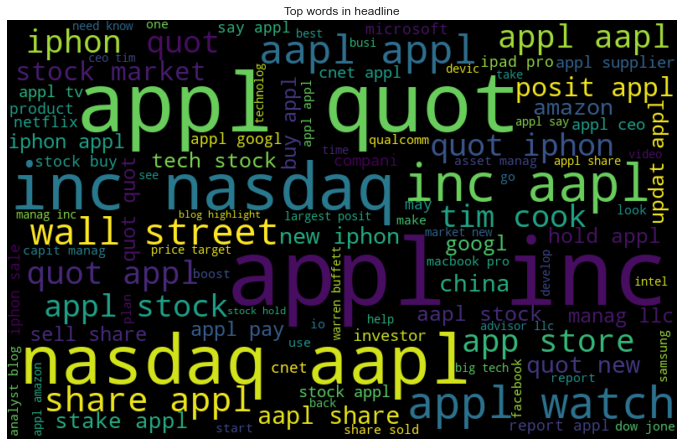

In [40]:
#Visualize wordcloud
normal_words = ' '.join([word for word in data['cleaned_Headlines']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')
plt.title('Top words in headline')

In [41]:
from textblob import TextBlob

In [42]:
data['Polarity']=data['cleaned_Headlines'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [43]:
data['Headline_count']=data['cleaned_Headlines'].apply(lambda x:len(x))

In [44]:
data['Word_Count']=data['cleaned_Headlines'].apply(lambda x:len(x.split()))

In [45]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len= word_len + len(word)
        return word_len/len(words)    

In [46]:
data['avg_word_len']=data['cleaned_Headlines'].apply(lambda x:get_avg_word_len(x))

In [47]:
data.head(5)

,Headlines,cleaned_Headlines,Polarity,Headline_count,Word_Count,avg_word_len
Date,,,,,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,expect appl inc reason might wrong appl inc re...,0.100130,133,25,0.240000
2015-01-02,What to expect from Apple in 2015 beyond its s...,expect appl beyond smartwatch amazon quot late...,0.134640,1980,346,0.017341
2015-01-03,Mountie: An inexpensive and innovative way to ...,mounti inexpens innov way attach iphon ipad ma...,0.157305,782,133,0.045113
2015-01-04,"Donald Yacktman on the Sources of Moats, His C...",donald yacktman sourc moat concern appl quot s...,0.259848,585,98,0.061224
2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",sim free iphon plu reportedli debut tomorrow l...,0.093826,2469,429,0.006993
